In [11]:
%matplotlib inline
from multinomial_logistic import getClassifierAndVectorizer
import numpy as np
import glob, os, pickle
import math
import pickle
import collections
import operator
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from time import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
print('test')

test


In [13]:
clf, vectorizer = getClassifierAndVectorizer()

imported correctly


In [14]:

def extractor(n=100000):
    #n is number of opinions from each year"
    filename = "sentences_new/"
    datafiles = sorted(glob.glob(filename + "sent_????"))
    test_files = []
    year = []
    cases_per_year = []
    y = 1891
    case_names = []
    a = 0
    for d in datafiles:
        sentences = sorted(glob.glob(d + "/*.txt"))
        for i, sentence in enumerate(sentences):
            if i >= n:
                break
            myfile = open(sentence,'r') 
            data=myfile.read().replace('\n', '')
            test_files.append(data)
            year.append(y)

            #adding case no and judge no.
            case_n = ""
            flag = False
            for j in sentence:
                if j == "X":
                    flag = True
                if j == "_":
                    flag = False
                if j == ".":
                    flag = False
                if flag == True:
                    case_n += j
            case_names.append(case_n)

            myfile.close()
        cases_per_year.append(len(sentences))
        y += 1
    print(a)
    return test_files, year, cases_per_year, case_names

def loadDataset(pklPath):
    with open(pklPath, "rb") as pklFile:
        return np.array(pickle.load(pklFile, encoding="utf-8"))

In [ ]:
#get the data from the sentences
cases, year_of_case, cases_per_year, case_names = extractor()
x_test = vectorizer.transform(cases)
prediction = clf.predict(x_test)


0


In [19]:
fvl = loadDataset('court-test.pkl')



In [20]:
import os
fact = []
value = []
print(len(fvl))
for i in range(len(fvl)):
    dict_val = fvl[i]
    factVsValue = dict_val['label']
    x_featurizer = vectorizer.transform(dict_val['text'])
    ConsVsDeon = clf.predict(x_featurizer)
    if factVsValue == 1:
        fact.append(ConsVsDeon)
    elif factVsValue == 2:
        value.append(ConsVsDeon)


        
    


260322


In [21]:
factCons = 0
factDeon = 0
factOther = 0
ValCons = 0
ValDeon = 0
ValOther = 0

for i in fact:
    if i[0] == 'cons':
        factCons += 1
    elif i[0] == 'deon':
        factDeon += 1
    elif i[0] == 'other':
        factOther += 1

for i in value:
    if i[0] == 'cons':
        ValCons += 1
    elif i[0] == 'deon':
        ValDeon += 1
    elif i[0] == 'other':
        ValOther += 1

print("factcons:", factCons, "factdeon:", factDeon, "factother:", factOther)
print("valcons:", ValCons, "valdeon:", ValDeon, "valother:", ValOther)



factcons: 54527 factdeon: 4934 factother: 35593
valcons: 92317 valdeon: 7149 valother: 65802


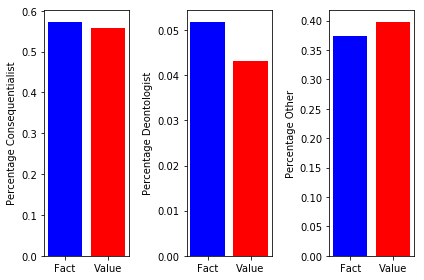

In [27]:

plt.subplot(1,3,1)
plt.bar("Fact", (factCons/(factCons+factDeon+factOther)), color='b',)
plt.bar("Value", (ValCons/(ValCons+ValDeon+ValOther)), color='r')
plt.ylabel("Percentage Consequentialist")
plt.subplot(1,3,2)
plt.bar("Fact", (factDeon/(factCons+factDeon+factOther)), color='b',)
plt.bar("Value", (ValDeon/(ValCons+ValDeon+ValOther)), color='r')
plt.ylabel("Percentage Deontologist")
plt.subplot(1,3,3)
plt.bar("Fact", (factOther/(factCons+factDeon+factOther)), color='b',)
plt.bar("Value", (ValOther/(ValCons+ValDeon+ValOther)), color='r')
plt.ylabel("Percentage Other")
plt.tight_layout()
plt.savefig("FactVal.png", dpi=300)

In [31]:
##old way for SVM, for multnimoal logistic see below:

n_grams = vectorizer.get_feature_names()
coef = clf.coef_[0].tolist()
#print(len(coef))
top = 10
predictors = []
#print(len(n_grams))
#print(len(coef))
for i in range(top):
    val = min(coef)
    index = coef.index(val)
    predictors.append([n_grams[index], val])
    n_grams.pop(index)
    coef.pop(index)
for i in range(top):
    val = max(coef)
    index = coef.index(val)
    predictors.append([n_grams[index], val])
    n_grams.pop(index)
    coef.pop(index)
#for i in predictors:
    #print (i ,"\n")

In [51]:
#getting the ngram ranking
ngram = vectorizer.get_feature_names()
ngram2d = np.asarray(ngram).reshape(len(ngram), 1)
print(ngram2d.shape)
ngram_feature = vectorizer.transform(ngram2d.ravel())
ngram_prediction = clf.decision_function(ngram_feature)

(437489, 1)


In [61]:
#getting dictionary of ngram with probabilities
cons_ngram = []
cons_nproba = []
deon_ngram = []
deon_nproba = []
for i, j in zip(ngram, ngram_prediction):
    j = j.tolist()
    max_proba = max(j)
    if j.index(max_proba) == 0:
        cons_ngram.append(i)
        cons_nproba.append(max_proba)
    elif j.index(max_proba)== 1:
        deon_ngram.append(i)
        deon_nproba.append(max_proba)

In [94]:
#word cloud setup
top = 55
predictors = []
deon_dic = dict()
cons_dic = dict()

for i in range(top):
    val = max(cons_nproba)
    index = cons_nproba.index(val)
    predictors.append([cons_ngram[index], val])
    flag = '\\x' in cons_ngram[index]
    if not flag:
        cons_dic[cons_ngram[index]] = abs(val)
        cons_ngram.pop(index)
        cons_nproba.pop(index)
for i in range(top):
    val = max(deon_nproba)
    index = deon_nproba.index(val)
    predictors.append([deon_ngram[index], val])
    deon_dic[deon_ngram[index]] = abs(val)
    deon_ngram.pop(index)
    deon_nproba.pop(index)

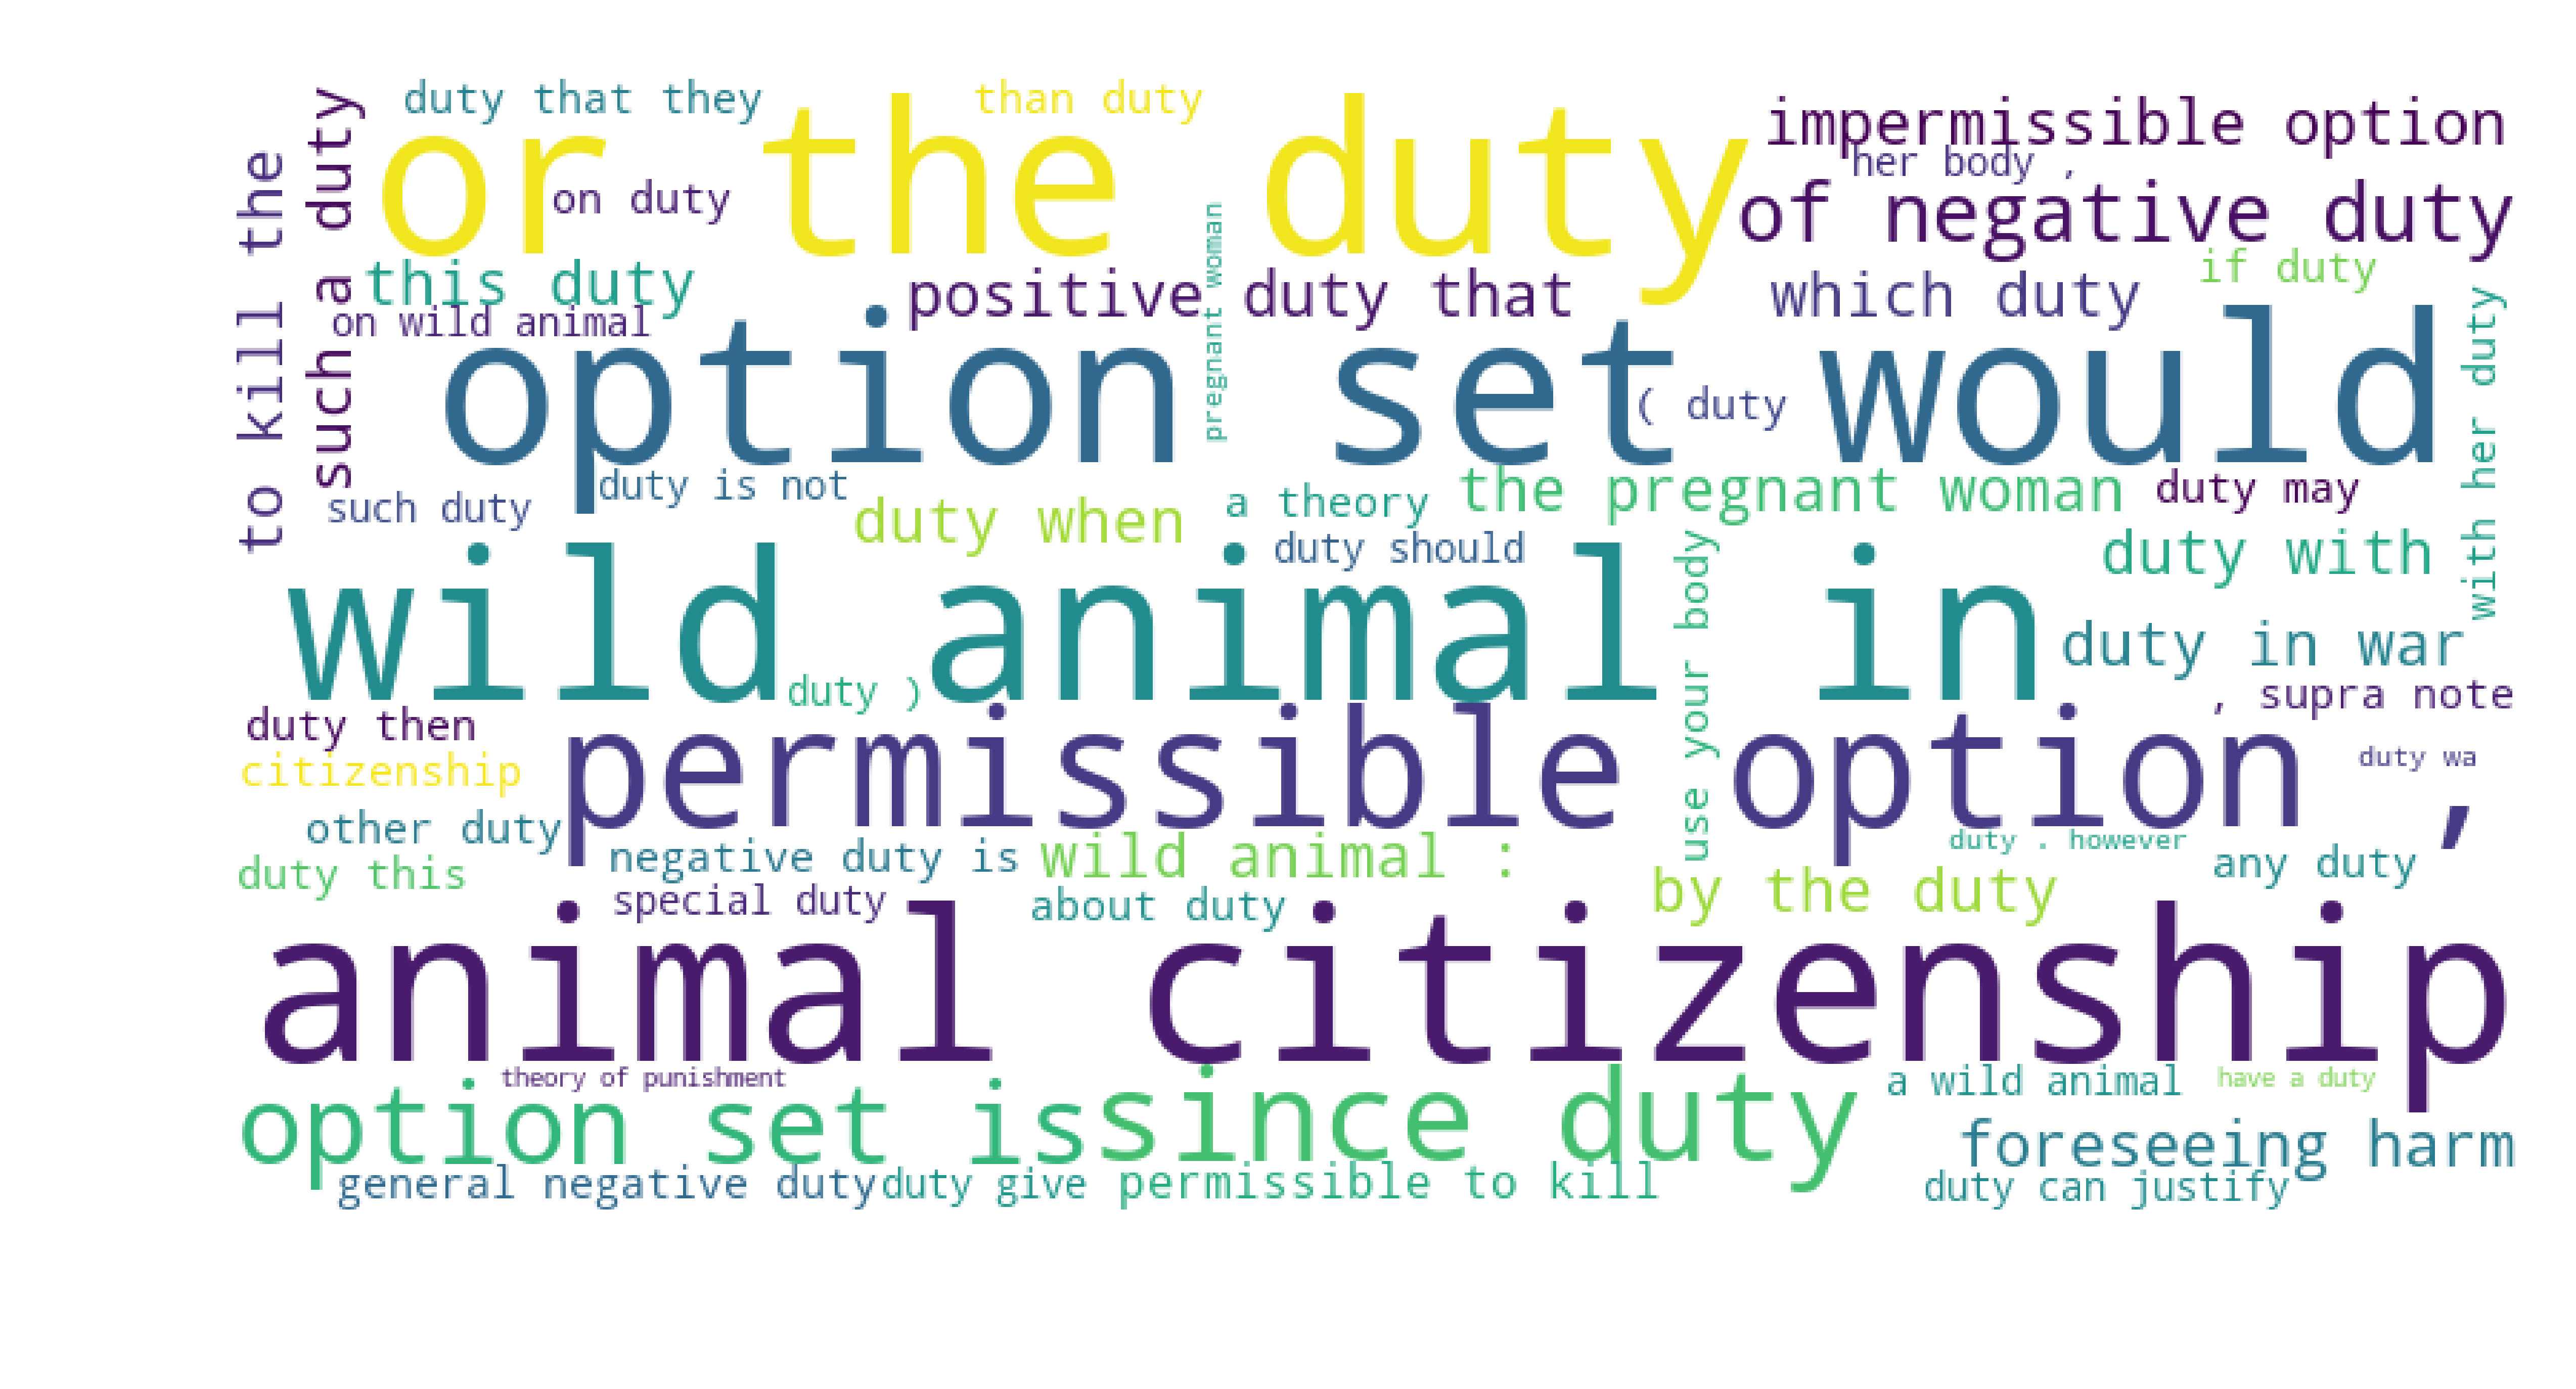

In [95]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", height=400, width=800).fit_words(deon_dic)
plt.figure(figsize=(6, 3), dpi=1000)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("deonCloud.png", dpi=300)

In [96]:
def extractorForPara(n=10000):
    #n is number of opinions from each year"
    filename = "paragraphs/"
    datafiles = sorted(glob.glob(filename + "para_????"))
    test_files = []

    for d in datafiles:
        paragraphs = sorted(glob.glob(d + "/*.pkl"))
        for i, para in enumerate(paragraphs):
            if i > n:
                break
            myfile = loadDataset(para)
            for j in myfile:
                if len(j) > 200:
                    test_files.append(j)

    return test_files

In [ ]:
paragraphs = extractorForPara() #run this without arguments for full analysis
x_test_para = vectorizer.transform(paragraphs)
prediction_para = clf.predict(x_test_para)

In [11]:
#Rank paragraohs



proba = clf.decision_function(x_test_para)
temp_proba = proba.copy().tolist()

consPara = []
deonPara = []

for i in range(100):
    #range determines how many 'top' paragraphs to find
    max_val = max(temp_proba)
    max_index = temp_proba.index(max_val)

    min_val = min(temp_proba)
    min_index = temp_proba.index(min_val)

    consPara.append(min_index)
    deonPara.append(max_index)

    temp_proba[max_index], temp_proba[min_index] = 0, 0

print(len(consPara))
print("Strongly Consequentialist")
for i in range(10):
    print(paragraphs[consPara[i]])
    print('\n')
print("Strongly Deontologist")
for j in range(10):
    print(paragraphs[deonPara[j]])
    print('\n')

100
Strongly Consequentialist
The plaintiff's device is simply another illustration of the use of indicia as an aid in selecting articles that might be subject to confusion. The carpenter's cabinet for augur bits, the druggist's medicine cabinet, the hotel keeper's rack for room keys, are other examples.


In Anderson's reply brief on direct appeal, Anderson's counsel addressed the effect of Apprendi on Anderson's sentence but not on the validity of Anderson's guilty plea.[fn3] Reply Brief of Appellant at 5, 6, United States v. Anderson, 243 F.3d 478 (8th Cir. 2001). Appellate counsel's failure to argue that Anderson's plea violated Rule 11 because Anderson was misinformed, in light of Apprendi, about the potential sentence range for his crime forms the basis of Anderson's ineffective assistance of counsel motion. The District Court denied Anderson's motion, finding that even if Anderson's appellate counsel was ineffective, Anderson was not prejudiced by counsel's performance. Anderson

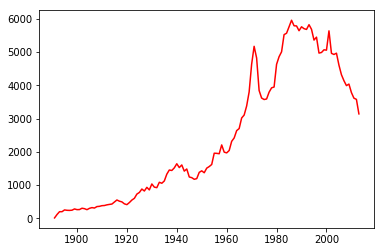

In [8]:
#for i, j in zip(attrib, prediction):
#        print('%r => %s' % (i, j))

#consPerYear = dict((yr,0) for yr in range(1891, 2014)) 
#deonPerYear = dict((yr,0) for yr in range(1891, 2014))
years = range(1891,2014)
consPerYear, deonPerYear = np.zeros(len(years)), np.zeros(len(years))
for i, j in zip(year_of_case, prediction):
    if j == "cons":
        consPerYear[i - 1891] += 1
    if j == "deon":
        deonPerYear[i - 1891] += 1
        
        
plt.plot(years, consPerYear, 'r')
#plt.plot(years, deonPerYear)
#plt.show()

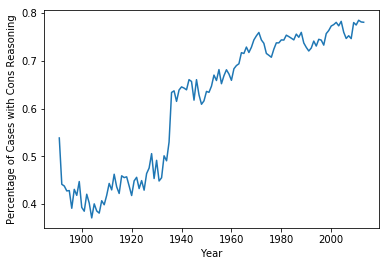

In [19]:
percentages = [] #consPerYear / cases_per_year
for i, j in zip(consPerYear, cases_per_year):
    if j < 10000:
        percentages.append(i/float(j))
    else:
        percentages.append(i/100)
plt.plot(years, percentages)
plt.xlabel("Year")
plt.ylabel("Percentage of Cases with Cons Reasoning")
plt.savefig("timeseries.png", dpi=300)

In [39]:
def MajVsDisExtractor():

    filename = "sentences_new/"
    datafiles = sorted(glob.glob(filename + "sent_????"))
    test_files = []
    maj_op = []
    dis_op = []

    d = datafiles[1920-1932]
    sentences = sorted(glob.glob(d + "/*.txt"))

    for i in range(len(sentences)):
        myfile = open(sentences[i],'r')
        data=myfile.read().replace('\n', '')
        if "MajOp" in sentences[i]:
            maj_op.append(data)
        elif "DisOp" in sentences[i]:
            dis_op.append(data)
    
        myfile.close()
    return maj_op, dis_op

In [38]:
majOp, disOp = MajVsDisExtractor()
majTest = vectorizer.transform(majOp)
predictionMaj = clf.predict(majTest)
disTest = vectorizer.transform(disOp)
predictionDis = clf.predict(disTest)

majOp, disOp = MajVsDisExtractor()
majTest = vectorizer.transform(majOp)
predictionMaj = clf.predict(majTest)
disTest = vectorizer.transform(disOp)
predictionDis = clf.predict(disTest)

0.7718390804597701
0.8217213114754098


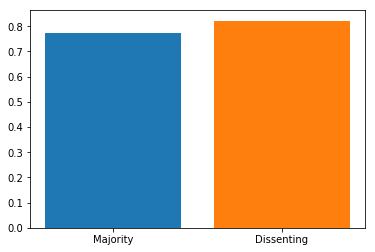

In [41]:
percentMajCons = predictionMaj.tolist().count('cons') / len(majOp)
percentDisCons = predictionDis.tolist().count('cons') / len(disOp)
plt.bar("Majority", percentMajCons)
plt.bar("Dissenting", percentDisCons)
print(percentMajCons)
print(percentDisCons)
plt.savefig("MajDis.png")

In [11]:
def loadDataset(pklPath):
    with open(pklPath, "rb") as pklFile:
        return np.array(pickle.load(pklFile, encoding="utf-8"))

In [ ]:
def loadDataset(pklPath):
    with open(pklPath, "rb") as pklFile:
        return np.array(pickle.load(pklFile, encoding="utf-8"))

In [12]:
genis = loadDataset("/Users/liammeier/moral-reasoning/bb2genis.pkl")
md = pd.read_stata("/Users/liammeier/FilesTooBigForGithub/circuit_metadata_excerpt.dta") #md for metadata

In [ ]:
#print(metadata['songername'])
#print(df.keys())
#print(type(df))
print(md)

In [13]:
md.keys()
md = md.set_index('caseid')


In [14]:
c = md.loc['XB0OIFQNB5G0']
print(c)
a = md.loc['XB0OIFQNB5G0']['Author'].iloc[0]
print(a)
s = c['songername']
for i, name in enumerate(s):
    if a in name:
        correctName = name

print(correctName)

              Circuit  j date             songername  Affirmed  \
caseid                                                           
XB0OIFQNB5G0        8  2  NaT                              1.0   
XB0OIFQNB5G0        8  3  NaT  NELSON, SUSAN RICHARD       1.0   
XB0OIFQNB5G0        8  1  NaT                              1.0   

              AffirmedInPart  Reversed  ReversedInPart  Vacated  \
caseid                                                            
XB0OIFQNB5G0             0.0       0.0             0.0      0.0   
XB0OIFQNB5G0             0.0       0.0             0.0      0.0   
XB0OIFQNB5G0             0.0       0.0             0.0      0.0   

              VacatedInPart  Remanded  Dissenting1 Author  Writer  
caseid                                                             
XB0OIFQNB5G0            0.0       0.0          0.0            NaN  
XB0OIFQNB5G0            0.0       0.0          0.0            NaN  
XB0OIFQNB5G0            0.0       0.0          0.0           

In [ ]:
a.iloc[0]

In [15]:
case_songername = []
bad_cases = []
for case in case_names:
    try:
        c =  md.loc[case]
        author = c['Author'].iloc[0]
        songername = c['songername']
        for i, name in enumerate(songername):   
            if author in name:
                correctName = name
            #if author == '' and name != '':
            #    correctName = name
        case_songername.append(correctName)
    except:
        case_songername.append(-1)
        bad_cases.append(case)


In [ ]:
#print(case_names)
print(len(case_songername))
print(len(prediction))

In [16]:
bios = pd.read_stata("/Users/liammeier/moral-reasoning/JudgesBioReshaped_TOUSE.dta")

In [21]:
bios = bios.set_index('songername')

In [22]:
attributes = ['birthyear']
#print(case_songername[0])
j = bios.loc[case_songername[0]]
print(j.loc['birthyear'])

def makeAtrList(atr):
    listToReturn = []
    for name in case_songername:
        try:
            judge = bios.loc[name]
            listToReturn.append(judge.loc[atr])
        except:
            listToReturn.append(-1)
    return listToReturn

1952.0


In [23]:
attributes = ['birthyear', 'presidentname', 'genderNew', 'nameofschool1', 'nameofschool2', 'nameofschool3', 'nameofschool4', 'nameofschool5',
              'raceorethnicity', 'partyaffiliationofpresident', 'placeofbirthstate']
atr = dict()    
for a in attributes:
    atr[a] = makeAtrList(a)

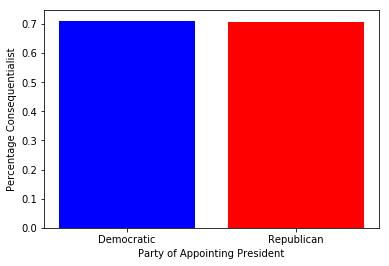

In [32]:
#Appointing President Party Affiliation
partyList = atr['partyaffiliationofpresident']
repCons = 0
demCons = 0
numRep = 0
numDem = 0
for i, j in zip(partyList, prediction):
    if i == "Democratic":
        numDem += 1
        if j == "cons":
            demCons +=1
    elif i == "Republican":
        numRep += 1
        if j == "cons":
            repCons +=1

plt.bar("Democratic", (demCons/numDem), color='b',)
plt.bar("Republican", (repCons/numRep), color='r')
plt.ylabel("Percentage Consequentialist")
plt.xlabel("Party of Appointing President")
plt.savefig("party.png")

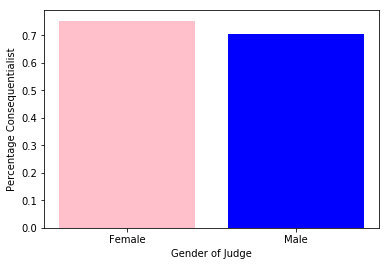

In [26]:
#By Gender
genderList = atr['genderNew']
femCons = 0
malCons = 0
numFem = 0
numMal = 0
for i, j in zip(genderList, prediction):
    if i == "M":
        numMal += 1
        if j == "cons":
            malCons +=1
    elif i == "F":
        numFem += 1
        if j == "cons":
            femCons +=1

plt.bar("Female", (femCons/numFem), color='pink',)
plt.bar("Male", (malCons/numMal), color='b')
plt.ylabel("Percentage Consequentialist")
plt.xlabel("Gender of Judge")
plt.savefig("genderbar.png", dpi=300)

In [27]:
school1 = atr['nameofschool1']
school2 = atr['nameofschool2']
school3 = atr['nameofschool3']
school4 = atr['nameofschool4']
school5 = atr['nameofschool5']

schoolSet = set(school1+school2+school3+school4+school5)
schoolCons = dict()
#schoolTotal = dict(schoolSet)
schoolTotal = dict.fromkeys(schoolSet, 0)
schoolCons = dict.fromkeys(schoolSet, 0)

#assuming last school attended is the law school

for a, b, c, d, e, pred in zip(school1, school2, school3, school4, school5, prediction):
    if e != '':
        schoolTotal[e] += 1
        if pred == 'cons':
            schoolCons[e] += 1
    elif d != '':
        schoolTotal[d] += 1
        if pred == 'cons':
            schoolCons[d] += 1
    elif c != '':
        schoolTotal[c] += 1
        if pred == 'cons':
            schoolCons[c] += 1
    elif b != '':
        schoolTotal[b] += 1
        if pred == 'cons':
            schoolCons[b] += 1
    elif a != '':
        schoolTotal[a] += 1
        if pred == 'cons':
            schoolCons[a] += 1
    else:
        pass

#for s in schoolSet:
#    schoolTotal[s] = school.count(s)
   
#for i, j in zip(school, prediction):
#    schoolCons[i] = 0
    
#for i, j in zip(school, prediction):
#    if j == 'cons':
#        schoolCons[i] += 1
total = sum(schoolTotal.values())
consTotal = sum(schoolCons.values())
overallPercentage = consTotal / total
percentDict = dict()
#come back and add n = ...
for i in schoolTotal.keys():
    if schoolTotal[i] > 1000:
        p = schoolCons[i]/schoolTotal[i]
        percentDict[i] = p / overallPercentage - 1


 
#x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
sorted_percentDict = sorted(percentDict.items(), key=operator.itemgetter(1))
for i in sorted_percentDict:
    print(i)

#print(sorted_percentDict)
        
#print(schoolTotal)
#print(schoolCons)
'''
plt.figure(figsize=(20,10))
for i in schoolTotal.keys():
    if schoolTotal[i] > 1000:
        plt.bar(i, schoolCons[i]/schoolTotal[i])
'''


('Read law', -0.25214131949974705)
('Washington and Lee University School of Law', -0.19263033307522393)
('Cumberland School of Law', -0.11881707537790853)
('University of North Carolina School of Law', -0.09975337884454571)
('University of Wisconsin Law School', -0.09540491358759562)
('University of Iowa College of Law', -0.0848056824654404)
('Boston University School of Law', -0.08353412098049218)
('University of Michigan Law School', -0.051396290882079754)
('University of Oxford', -0.03557316970036939)
('Mercer University School of Law', -0.02535677053148544)
(-1, -0.024013114596102447)
('Georgetown College Law School (now Georgetown University Law Center)', -0.01954368492801406)
('University of Wyoming College of Law', 0.005213726681312814)
('University of Nebraska College of Law', 0.005681118218851866)
('University of Pennsylvania Law School', 0.007408596945169155)
('St. Louis University School of Law', 0.012338721564653321)
('University of California, Berkeley, Boalt Hall School 

'\nplt.figure(figsize=(20,10))\nfor i in schoolTotal.keys():\n    if schoolTotal[i] > 1000:\n        plt.bar(i, schoolCons[i]/schoolTotal[i])\n'

In [ ]:
a = bios.loc['ADAMS, HENRY LEE']
print(a)
#for i, j in zip(a.keys(), a):
#    print(i, "-->" , j)

In [30]:
#birthyear, nameofschool1, degree_law, raceorethnicity, placeofbirthstate, partyaffiliationofrenompres, genderNew, party
# political_party,
states = atr['placeofbirthstate']

stateSet = set(states)
stateTotal = dict.fromkeys(stateSet, 0)
stateCons = dict.fromkeys(stateSet, 0)

for state, pred in zip(states, prediction):
    if state != '':
        stateTotal[state] += 1
        if pred == 'cons':
            stateCons[state] += 1
            
statePercentages = {s:(stateCons[s]/stateTotal[s]) for s in stateSet}
print(statePercentages)


{'IN': 0.6532675709001233, 'OK': 0.6897899364924279, 'Sweden': 1.0, 'GA': 0.6791584483892176, 'CT': 0.701721394474179, 'Venezuela': 0.75, 'England': 1.0, 'ND': 0.751984126984127, 'Norway': 0.3448275862068966, 'Australia': 1.0, 'Spain': 0.9090909090909091, ' ': 0.5, 'NY': 0.7461397914950023, 'VA (now WV)': 0.37209302325581395, 'IL': 0.7322881355932204, 'France': 0.7428571428571429, 'ID': 0.7328339575530587, 'Ecuador': 0.5, 'LA': 0.759176623002735, 'RI': 0.6964285714285714, 'VT': 0.6071958456973294, 'WY': 0.6900420757363254, 'SD': 0.7693266832917706, 'Ukraine': 0.55, 'Germany': 0.5577889447236181, 'WV': 0.7502558853633572, 'TN': 0.7419834710743801, 'Hungary': 1.0, 'Mexico': 0.7848699763593381, 'China': 0.7468354430379747, 'Saudi Arabia': 0.7724550898203593, 'NJ': 0.7063428662725675, 'Denmark': 0.3333333333333333, 'Canada': 0.49004329004329006, 'ME': 0.6208258527827648, 'MS': 0.7125262054507338, 'NH': 0.5040365984930032, 'MD': 0.7144197685329997, 'IA': 0.665517901589125, 'OR': 0.650299401

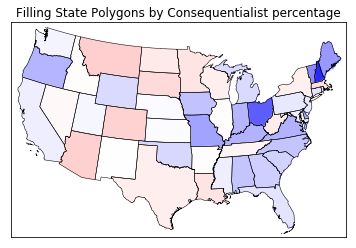

In [31]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

colors={}
statenames=[]
cmap = plt.cm.bwr # use 'hot' colormap
vmin = .46; vmax = 1 # set range.
#print(m.states_info)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        #change state name to stae initials
        state_initial = us_state_abbrev[statename]
        pop = statePercentages[state_initial]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        #colors[statename] = cmap(1.-(np.sqrt((pop-vmin)/(vmax-vmin))))[:3]
        colors[statename] = cmap((pop-vmin)/(vmax-vmin))
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

#plt.colorbar(m)
#plt.colorbar()
plt.title('Filling State Polygons by Consequentialist percentage')
#plt.show()
plt.savefig("map.png")

In [4]:
clf, vectorizer = getClassifierAndVectorizer()
coef = clf.coef_[0].tolist()
print(len(coef))
top = 50
predictors = []
deon_dic = dict()
cons_dic = dict()
n_grams = vectorizer.get_feature_names()
print(len(n_grams))
print(len(coef))
for i in range(top):
    val = min(coef)
    index = coef.index(val)
    predictors.append([n_grams[index], val])
    if i > 1:   #because we are having trouble deleting '\xe2\x80\x94' b/c weird escape sequence stuff
        cons_dic[n_grams[index]] = abs(val)
    n_grams.pop(index)
    coef.pop(index)
for i in range(top):
    val = max(coef)
    index = coef.index(val)
    predictors.append([n_grams[index], val])
    deon_dic[n_grams[index]] = abs(val)
    n_grams.pop(index)
    coef.pop(index)


imported correctly
259186
259186
259186


In [5]:
wordcloud = WordCloud(background_color="white", height=400, width=800).fit_words(cons_dic)

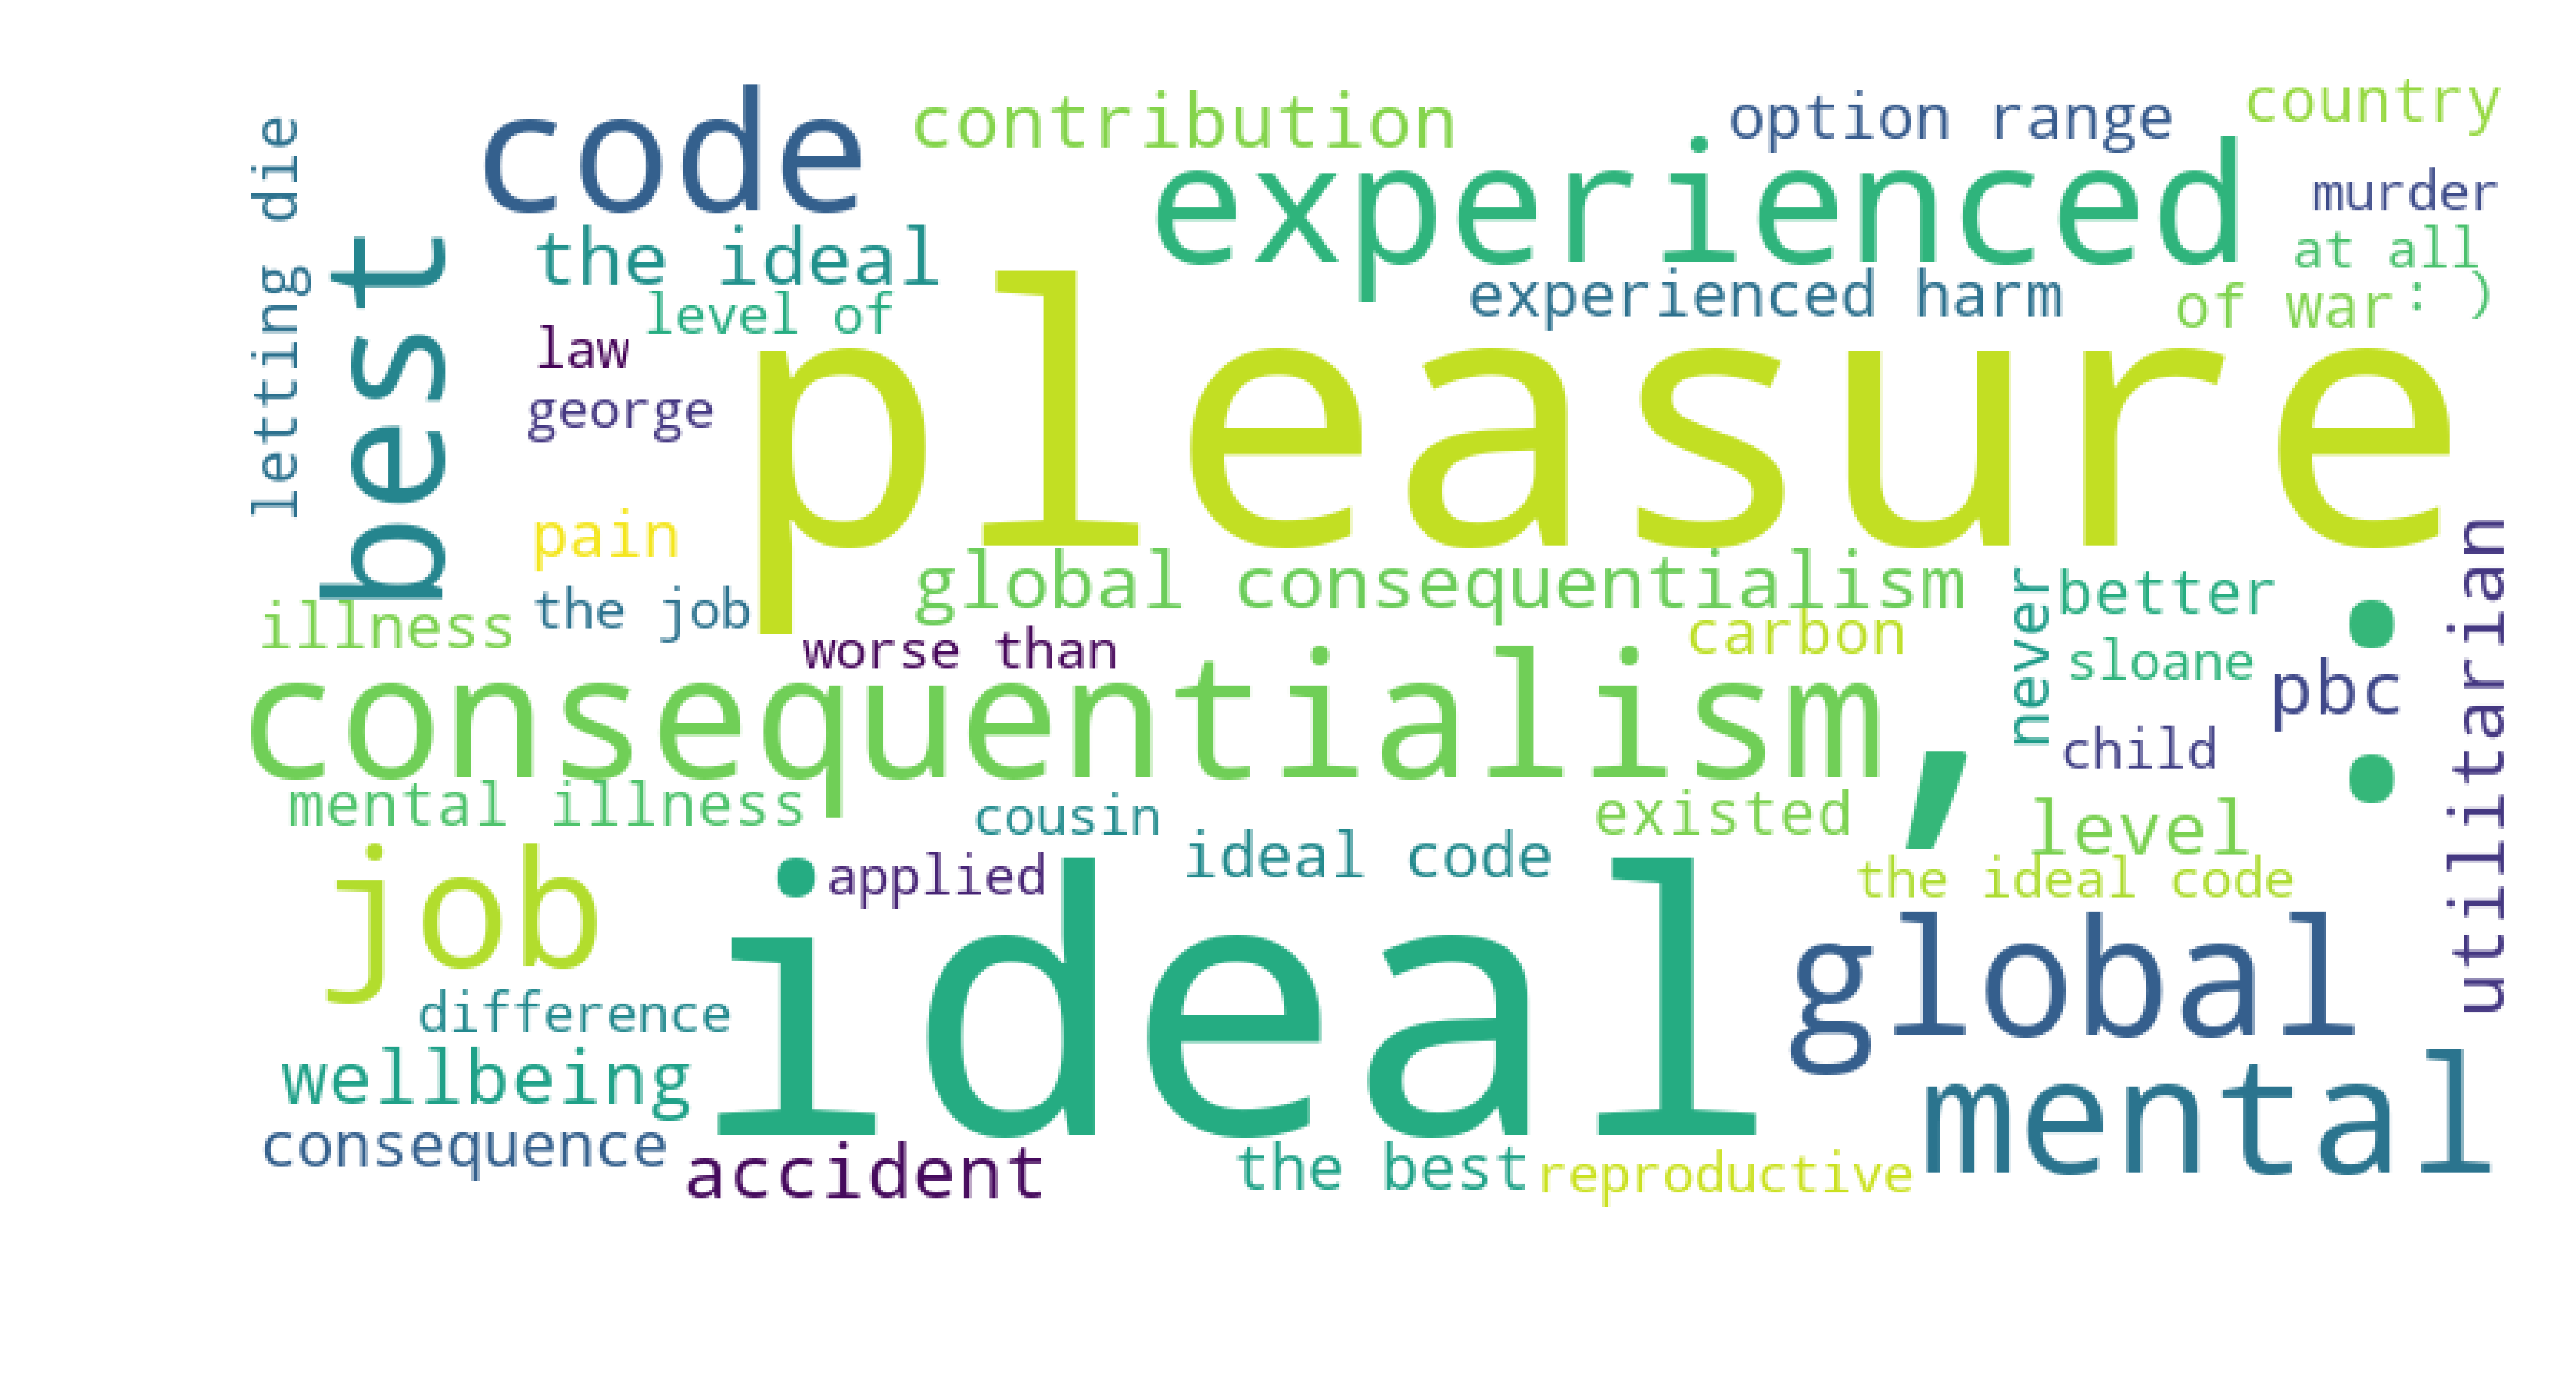

In [6]:
plt.figure(figsize=(6, 3), dpi=1000)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()